In [118]:
import pandas as pd

c_df = pd.read_csv('./datasets/life_expectancy.csv')
c_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [119]:
c_df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [120]:
c_df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [121]:
c_df.dropna(subset=['Life expectancy ', 'GDP', 'Hepatitis B', 'Diphtheria '], inplace=True)

In [122]:
columns_to_impute = ['Alcohol', ' BMI ', 'Total expenditure', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

for column in columns_to_impute:
    mean_value = c_df[column].mean()
    c_df[column].fillna(mean_value, inplace=True)


In [123]:
c_df.drop(['Country', 'Year' , 'Population'], axis=1, inplace=True)

In [124]:
c_df.drop(['Status',], axis=1, inplace=True)

In [117]:
# from sklearn.preprocessing import LabelEncoder

# columns = ['Status']
# encoders = {}

# for column in columns:
#     encoder = LabelEncoder()
#     result = encoder.fit_transform(c_df[column])
#     c_df[column] = result
#     encoders[column] = encoder.classes_

# print(encoders)

# from sklearn.preprocessing import StandardScaler

# features = c_df

# std = StandardScaler()
# std_features = std.fit_transform(features)
# std_under_h_df = pd.DataFrame(std_features, columns=features.columns)

# for column in std_under_h_df.columns:
#     std_under_h_df.drop(
#         std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].index, 
#         axis=0, 
#         inplace=True)

# for column in std_under_h_df.columns:
#     print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')

# c_df = c_df.iloc[std_under_h_df.index].reset_index(drop=True)

In [125]:
c_df['Life expectancy '] = c_df.pop('Life expectancy ')

In [126]:
from sklearn.model_selection import train_test_split

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [127]:
display(train_df)
display(test_df)

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,429.0,52,7.380000,365.258572,72.0,1166,4.9,76,71.0,8.310000,71.0,24.0,2681.781000,15.4,18.1,0.629,13.0,56.0
1,4.0,556,9.710000,6.416253,18.0,110927,19.3,893,45.0,4.110000,36.0,5.4,87.893874,12.9,12.9,0.463,8.9,49.2
2,15.0,0,7.840000,11.567156,94.0,0,44.7,0,95.0,6.350000,95.0,0.1,741.484380,3.8,3.8,0.741,15.8,72.9
3,11.0,21,0.010000,54.237318,95.0,0,58.4,24,95.0,7.210000,95.0,0.1,547.851700,6.0,5.8,0.741,14.4,75.4
4,84.0,0,0.670000,2538.941033,96.0,3,34.2,0,97.0,2.230000,98.0,0.1,37951.286000,6.1,5.6,0.840,14.2,77.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,81.0,0,4.372791,0.000000,99.0,18,71.4,1,99.0,5.790129,99.0,0.1,28975.418000,3.5,3.4,0.799,13.3,74.7
1603,132.0,6,2.100000,22.486384,74.0,0,47.3,6,84.0,5.850000,81.0,0.1,495.294791,2.8,2.9,0.728,11.6,78.0
1604,8.0,0,4.510000,428.749067,98.0,0,57.2,1,98.0,5.880000,98.0,0.1,4575.763787,1.2,1.3,0.761,14.2,77.5
1605,291.0,2,9.020000,545.438957,75.0,0,31.9,3,78.0,2.860000,81.0,10.0,8352.817110,6.9,6.8,0.645,12.4,61.6


,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,133.0,1,8.58,541.824347,93.0,2,54.5,1,97.0,8.99,92.0,0.1,4129.758741,2.5,2.5,0.739,13.4,73.6
1,124.0,0,1.95,4.299053,98.0,926,16.2,0,98.0,5.78,98.0,0.1,32.372390,14.6,14.7,0.597,12.0,71.8
2,119.0,5,0.01,306.182431,94.0,0,51.5,6,97.0,6.40,94.0,0.1,7891.299776,2.8,2.9,0.752,12.2,72.5
3,139.0,1,10.99,851.450672,95.0,1,63.9,1,95.0,7.11,95.0,0.1,7378.255390,1.9,1.9,0.778,14.3,73.9
4,432.0,72,1.43,36.297752,73.0,20,15.9,112,73.0,4.29,73.0,13.2,458.884355,8.7,8.6,0.461,8.9,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,66.0,0,10.62,158.708740,88.0,0,54.3,0,98.0,6.83,98.0,0.1,2293.478900,0.9,1.0,0.815,13.0,78.5
398,83.0,0,2.16,1380.228095,98.0,11,55.6,0,98.0,3.37,98.0,0.1,15846.476410,6.1,5.9,0.803,13.9,75.2
399,129.0,2,3.28,47.817042,55.0,50,46.0,2,81.0,6.94,8.0,0.1,691.997711,3.1,3.1,0.000,11.4,71.8
400,287.0,14,0.01,48.730471,84.0,564,23.1,20,84.0,5.12,84.0,1.5,579.434850,6.8,6.6,0.470,12.0,59.4


In [128]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

print(pca_train.shape, pca_test.shape)

(1607, 2) (402, 2)


In [129]:
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df['Life expectancy ']

pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df['Life expectancy ']

In [130]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.81120558 0.18507534]
0.9962809290770055


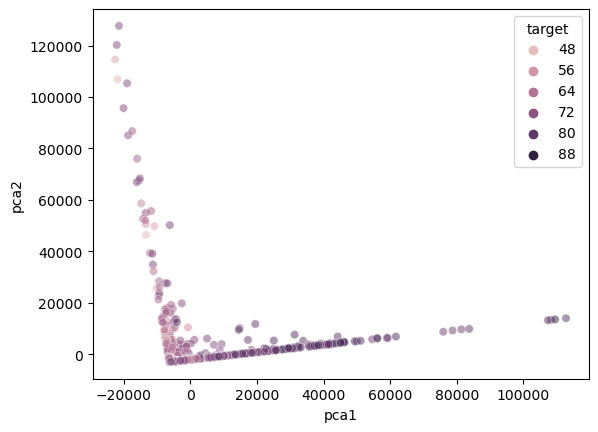

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="pca1", y="pca2", hue='target', data=pca_train_df, alpha=0.5)
plt.show()

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
parameters = {'max_depth': [5, 10, 20], 'min_samples_split': [10, 50, 100]}
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

rf_r = RandomForestRegressor(random_state=124)

# import sklearn
# sklearn.metrics.SCORERS.keys()
g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5, return_train_score=True, scoring='accuracy')
g_rfc.fit(features, targets)

grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(features, targets)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
           ^^^^

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [10, 50, 100]},
             scoring='r2')

In [133]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 10}",0.380458,5
1,"{'max_depth': 5, 'min_samples_split': 50}",0.380819,4
2,"{'max_depth': 5, 'min_samples_split': 100}",0.381986,1
3,"{'max_depth': 10, 'min_samples_split': 10}",0.345867,8
4,"{'max_depth': 10, 'min_samples_split': 50}",0.372699,6
5,"{'max_depth': 10, 'min_samples_split': 100}",0.381252,2
6,"{'max_depth': 20, 'min_samples_split': 10}",0.318509,9
7,"{'max_depth': 20, 'min_samples_split': 50}",0.370118,7
8,"{'max_depth': 20, 'min_samples_split': 100}",0.381190,3
